In [1]:
import tensorflow as tf
import numpy as np
import src

In [2]:
problem = src.TSPProblem()
# problem = src.SortingProblem()

In [3]:
tf.reset_default_graph()
network = src.PointerNetwork('cfg')
network.makeGraph()
seqLen = network.maxTimeSteps
batchSize = network.batchSize

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [4]:
trainingParams = {}
trainingParams['batchSize'] = batchSize
trainingParams['length'] = seqLen
trainingParams['numCities'] = seqLen

losses = []

# train on numBatches batches of 100 samples each
saver = tf.train.Saver()
numBatches = 3000
with tf.Session() as sess:
    # initialize variables
    sess.run(tf.global_variables_initializer())
    
    # write out log for graph visualization
    writer = tf.summary.FileWriter('checkpoints/', sess.graph)

    for batch in range(numBatches):
        # make current batch of training data
        inputs = problem.makeBatch(trainingParams)
        trainingInputs, targets = problem.makeTargets(inputs)
        
        # apply one training step
        _, loss = sess.run([network.trainOp, network.loss], 
                           feed_dict={network.train: True,
                                      network.rawInputs: inputs,
                                      network.targets: targets,
                                      network.targetInputs: trainingInputs[:,:-1,:]})
        
        # keep track of the loss values
        losses.append(loss)
        
        if batch % 100 == 0 or batch == numBatches-1:
            
            # generate a test batch and output its accuracy and also a sample
            print('Batch: ' + str(batch))
            newInputs = problem.makeBatch(trainingParams)
            output = sess.run(network.decoderOutputs, feed_dict={network.train: False,
                                                                 network.rawInputs: newInputs})
            print(newInputs[0, :, :].T)
            print(newInputs[0, :, :][np.array(output).T[0]].T)
            print(problem.accuracy(solution=np.array(output).T, batchArray=newInputs))
            
            # save checkpoint
            if batch > 0:
                saver.save(sess, 'checkpoints/SortingPointerNetwork', global_step=network.globalStep)

Batch: 0
[[ 0.31921495  0.35908617  0.97919901  0.11695446  0.06323939]
 [ 0.69851617  0.91137018  0.17122256  0.92595236  0.88116783]]
[[ 0.97919901  0.31921495  0.06323939  0.11695446  0.35908617]
 [ 0.17122256  0.69851617  0.88116783  0.92595236  0.91137018]]
1.12516902364
Batch: 100
[[ 0.03696373  0.41851267  0.44884475  0.01808824  0.67703721]
 [ 0.3632051   0.98612421  0.15101342  0.01370854  0.96773145]]
[[ 0.67703721  0.41851267  0.44884475  0.03696373  0.01808824]
 [ 0.96773145  0.98612421  0.15101342  0.3632051   0.01370854]]
1.07389338033
Batch: 200
[[ 0.53296232  0.13994958  0.07345299  0.38446188  0.41779168]
 [ 0.80766097  0.54988558  0.14293672  0.04231981  0.63070323]]
[[ 0.53296232  0.41779168  0.13994958  0.07345299  0.38446188]
 [ 0.80766097  0.63070323  0.54988558  0.14293672  0.04231981]]
0.980377666918
Batch: 300
[[ 0.39646406  0.46149666  0.64257038  0.77974874  0.74385773]
 [ 0.40847052  0.56726271  0.48787852  0.93330343  0.54787386]]
[[ 0.77974874  0.74385773 

1.00426049702
Batch: 2999
[[ 0.4271937   0.09991091  0.22592054  0.82149033  0.42510495]
 [ 0.63177811  0.20771465  0.57221972  0.88846569  0.67103404]]
[[ 0.82149033  0.42510495  0.4271937   0.22592054  0.09991091]
 [ 0.88846569  0.67103404  0.63177811  0.57221972  0.20771465]]
0.987906202358


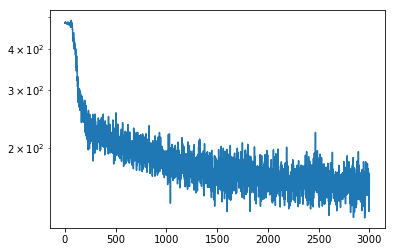

In [5]:
import matplotlib.pyplot as plt

plt.semilogy(losses)
plt.show()

The above cells train the sorting problem according to max time in cfg (default is 5).

Now, look at the accuracy of using these network weights on sorting 15 numbers and see how the network performs.

In [6]:
tf.reset_default_graph()
network = src.PointerNetwork('cfg')
network.maxTimeSteps = 15
network.batchSize = 100
network.makeGraph()

In [7]:
trainingParams = {}
trainingParams['batchSize'] = network.batchSize
trainingParams['length'] = network.maxTimeSteps
trainingParams['numCities'] = network.maxTimeSteps

saver = tf.train.Saver()
with tf.Session() as sess:
    # initialize variables
    sess.run(tf.global_variables_initializer())
    
    # generate a test batch and output its accuracy and also a sample
    newInputs = problem.makeBatch(trainingParams)
    
    # random parameters to compare
    output = sess.run(network.decoderOutputs, feed_dict={network.train: False,
                                                         network.rawInputs: newInputs})
    
    
    print(problem.accuracy(solution=np.array(output).T, batchArray=newInputs))
    
    # load graph
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints/'))  
    output = sess.run(network.decoderOutputs, feed_dict={network.train: False,
                                                     network.rawInputs: newInputs})
    print(newInputs[0, :, :].T)
    print(newInputs[0, :, :][np.array(output).T[0]].T)
    print(problem.accuracy(solution=np.array(output).T, batchArray=newInputs))

1.48813911805
INFO:tensorflow:Restoring parameters from checkpoints/SortingPointerNetwork-3000
[[ 0.42625032  0.69378216  0.16208656  0.51707622  0.66256397  0.31001627
   0.5603143   0.86428463  0.79845673  0.06982247  0.5013813   0.37516072
   0.46023156  0.24138373  0.71849335]
 [ 0.11833132  0.38157692  0.03005893  0.02028028  0.42801538  0.49362906
   0.41980336  0.25306926  0.47426916  0.87275159  0.5886851   0.48879784
   0.31253384  0.50538173  0.2237057 ]]
[[ 0.06982247  0.24138373  0.31001627  0.37516072  0.5013813   0.79845673
   0.66256397  0.5603143   0.69378216  0.86428463  0.71849335  0.46023156
   0.42625032  0.51707622  0.16208656]
 [ 0.87275159  0.50538173  0.49362906  0.48879784  0.5886851   0.47426916
   0.42801538  0.41980336  0.38157692  0.25306926  0.2237057   0.31253384
   0.11833132  0.02028028  0.03005893]]
1.05699419242


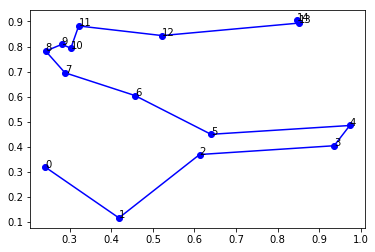

In [8]:
path = 2
x = newInputs[path, :, :][np.array(output).T[path]][:,0]
y = newInputs[path, :, :][np.array(output).T[path]][:,1]

plt.plot(x,y, 
         linestyle='-', marker='o', color='b')

for i in range(network.maxTimeSteps):
    plt.annotate(i, (x[i],y[i]))
plt.show()

In [9]:
# accuracies = []
# for i in range(3,25):

#     tf.reset_default_graph()
#     network = src.PointerNetwork('cfg')
#     network.maxTimeSteps = i
#     network.batchSize = 100
#     network.makeGraph()

#     trainingParams = {}
#     trainingParams['batchSize'] = network.batchSize
#     trainingParams['length'] = network.maxTimeSteps
#     trainingParams['numCities'] = network.maxTimeSteps

#     saver = tf.train.Saver()
#     with tf.Session() as sess:
#         # load graph
#         saver.restore(sess, tf.train.latest_checkpoint('checkpoints/'))

#         # generate a test batch and output its accuracy and also a sample
#         newInputs = problem.makeBatch(trainingParams)
#         output = sess.run(network.decoderOutputs, feed_dict={network.train: False,
#                                                              network.rawInputs: newInputs})

#         accuracies.append(problem.accuracy(solution=np.array(output).T, batchArray=newInputs))
        
# plt.plot(accuracies)
# plt.show()